# Marine Pollution

 Beniel I(862540105), Madhan VK(862485361)

In [ ]:
import pandas as pd
import numpy as np

This is the Phyoplankton dataset from: https://doi.pangaea.de/10.1594/PANGAEA.932417

Contains 37722 rows and 49 columns in which we will only be focusing on location(lat/long) and the its chlorophyll content.
This dataset is stored in a text file.

# Reading Phytoplanktons dataset and cleaning it

Kl is phytoplankton dataset abbreviation = krill

In [ ]:
kl = pd.read_csv('marine_phytoplankton.csv')
kl.head(3)

,Count,Event,Short reference,Paper doi,Data doi/data link,Profile number,Date,Year,Month,Day of the year,...,Max sampling depth magnitude,Max production depth magnitude,SST magnitude,surface PAR magnitude,Pbopt magnitude,Surface chl a magnitude,Depth-integrated chl a magnitude,Total chl a magnitude,Depth-integrated primary production magnitude,Production to biomass ratio magnitude
0,1,Albatros,Behrenfeld and Falkowski 1997\r\n,https://doi.org/10.4319/lo.1997.42.1.0001,http://sites.science.oregonstate.edu/ocean.pro...,1,16/03/1979,1979,3,75,...,very_low,very_low,low,moderate,low,low,low,moderate,low,low
1,2,Albatros,Behrenfeld and Falkowski 1997\r\n,https://doi.org/10.4319/lo.1997.42.1.0001,http://sites.science.oregonstate.edu/ocean.pro...,1,16/03/1979,1979,3,75,...,very_low,very_low,low,moderate,low,low,low,moderate,low,low
2,3,Albatros,Behrenfeld and Falkowski 1997\r\n,https://doi.org/10.4319/lo.1997.42.1.0001,http://sites.science.oregonstate.edu/ocean.pro...,1,16/03/1979,1979,3,75,...,very_low,very_low,low,moderate,low,low,low,moderate,low,low


The dataset contains no null values except for 'Event' and 'Paper Doi' which are irrelevant to our calculation and will be dropping them.

In [ ]:
kl.columns
kl.isna().sum()


,0
Count,0
Event,850
Short reference,0
Paper doi,20238
Data doi/data link,0
Profile number,0
Date,0
Year,0
Month,0
Day of the year,0


In [ ]:
kl.columns = kl.columns.str.replace(' ', '_').str.lower()
kl.columns


Index(['count', 'event', 'short_reference', 'paper_doi', 'data_doi/data_link',
       'profile_number', 'date', 'year', 'month', 'day_of_the_year',
       'latitude', 'longitude', 'day_length_(h)', 'bottom_depth_(m)',
       'bottom_depth_sd_(m)', 'mixed_layer_depth_(m)',
       'distance_from_coastline_(km)', 'euphotic_zone_depth_(m)',
       'sampling_depth_(m)', 'max_sampling_depth_(m)',
       'max_production_depth_(m)', 'sst_(°c)', 'sst_flag',
       'surface_par_(e_m^-2_day^-1)', 'par_flag', 'pbopt_(mg_c_mg_chla-1_h-1)',
       'depth-resolved_chl_a_(mg_m^-3)', 'depth-integrated_chl_a_(mg_m^-2)',
       'total_chl_a_(mg_m^-2)',
       'depth-resolved_primary_production_(mg_c_m^-3_day^-1)',
       'depth-integrated_primary_production_(mg_c_m^-2_day^-1)',
       'production_to_biomass_ratio_(mg_c_day-1_/_mg_chl_a)', 'hemisphere',
       'northern_hemisphere_season', 'bottom_depth_magnitude',
       'bottom_depth_sd_magnitude', 'mld_magnitude',
       'distance_from_coastline_magnit

These are the primary primary columns we require:
sst is sea surface temperature and has its flag (0->collected data, 1->from satellites). The features such as surface_par, depth_integrted, total_chl relate to the choloryphyll content of the phytoplankton

In [ ]:
columns_to_keep = [
    'date', 'year', 'latitude', 'longitude',
    'sst_(°c)', 'surface_par_(e_m^-2_day^-1)',
    'depth-integrated_chl_a_(mg_m^-2)', 'total_chl_a_magnitude'
]


kl = kl[columns_to_keep]
kl.head()

,date,year,latitude,longitude,sst_(°c),surface_par_(e_m^-2_day^-1),depth-integrated_chl_a_(mg_m^-2),total_chl_a_magnitude
0,16/03/1979,1979,38.78,-72.27,7.0,30.86,69.8231,moderate
1,16/03/1979,1979,38.78,-72.27,7.0,30.86,69.8231,moderate
2,16/03/1979,1979,38.78,-72.27,7.0,30.86,69.8231,moderate
3,16/03/1979,1979,38.78,-72.27,7.0,30.86,69.8231,moderate
4,16/03/1979,1979,38.78,-72.27,7.0,30.86,69.8231,moderate


This is the marine microplastic dataset containing 11671 rows and 22 columns: https://experience.arcgis.com/experience/b296879cc1984fda833a8acc93e31476/page/Page/?views=Data-Table


# Reading plastic dataset and cleaning it


In [ ]:
plastic = pd.read_csv('Marine_Microplastics.csv')
plastic.head(3)

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,...,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,10672,Pacific Ocean,NaN,NaN,Manta net,0.013,pieces/m3,0.005-1,Medium,Goldstein et al.2013,...,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000
1,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.000,pieces/m3,>=10,Very High,Queiroz et al.2022,...,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825
2,16506,Atlantic Ocean,Gulf of Mexico,NaN,Hand picking,NaN,pieces/10 mins,2-40,Medium,Tunnell et al. 2020,...,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,19.194400,-96.123600,5/31/2019 12:00:00 AM,9cfaccaf-49df-4cf6-bc62-b62efecffb9a,-96.123600,19.194400


In [ ]:
plastic.isna().sum()

,0
OBJECTID,0
Oceans,161
Regions,5897
SubRegions,10610
Sampling Method,0
Measurement,4382
Unit,0
Density Range,0
Density Class,0
Short Reference,0


In [ ]:
plastic.columns = plastic.columns.str.replace(' ', '_').str.lower()
plastic.columns

Index(['objectid', 'oceans', 'regions', 'subregions', 'sampling_method',
       'measurement', 'unit', 'density_range', 'density_class',
       'short_reference', 'long_reference', 'doi', 'organization', 'keywords',
       'accession_number', 'accession_link', 'latitude', 'longitude', 'date',
       'globalid', 'x', 'y'],
      dtype='object')

x, y are the latitude and longitude values respectively. The other features are paper links which we will not need.

In [ ]:
plastic = plastic.drop(['short_reference', 'long_reference', 'doi', 'organization', 'keywords',
                        'accession_number', 'accession_link', 'globalid', 'x', 'y'], axis=1)
plastic.head()

,objectid,oceans,regions,subregions,sampling_method,measurement,unit,density_range,density_class,latitude,longitude,date
0,10672,Pacific Ocean,NaN,NaN,Manta net,0.013000,pieces/m3,0.005-1,Medium,0.500000,-95.350000,10/17/2006 12:00:00 AM
1,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.000000,pieces/m3,>=10,Very High,0.631825,-45.398158,10/17/2018 12:00:00 AM
2,16506,Atlantic Ocean,Gulf of Mexico,NaN,Hand picking,NaN,pieces/10 mins,2-40,Medium,19.194400,-96.123600,5/31/2019 12:00:00 AM
3,8348,Pacific Ocean,NaN,NaN,Neuston net,0.008640,pieces/m3,0.005-1,Medium,33.470000,-151.630000,12/10/2011 12:00:00 AM
4,13589,Atlantic Ocean,NaN,NaN,Manta net,0.138471,pieces/m3,0.005-1,Medium,38.617833,-20.686667,6/13/2019 12:00:00 AM


In [ ]:
plastic = plastic.drop(['objectid', 'sampling_method'], axis=1)
plastic.head()

,oceans,regions,subregions,measurement,unit,density_range,density_class,latitude,longitude,date
0,Pacific Ocean,NaN,NaN,0.013000,pieces/m3,0.005-1,Medium,0.500000,-95.350000,10/17/2006 12:00:00 AM
1,Atlantic Ocean,NaN,NaN,1368.000000,pieces/m3,>=10,Very High,0.631825,-45.398158,10/17/2018 12:00:00 AM
2,Atlantic Ocean,Gulf of Mexico,NaN,NaN,pieces/10 mins,2-40,Medium,19.194400,-96.123600,5/31/2019 12:00:00 AM
3,Pacific Ocean,NaN,NaN,0.008640,pieces/m3,0.005-1,Medium,33.470000,-151.630000,12/10/2011 12:00:00 AM
4,Atlantic Ocean,NaN,NaN,0.138471,pieces/m3,0.005-1,Medium,38.617833,-20.686667,6/13/2019 12:00:00 AM


In [ ]:
plastic['date'] = pd.to_datetime(plastic['date'])

plastic['date'] = plastic['date'].dt.strftime('%Y')
plastic.head()

<ipython-input-13-0de8eb3f2acb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plastic['date'] = pd.to_datetime(plastic['date'])


,oceans,regions,subregions,measurement,unit,density_range,density_class,latitude,longitude,date
0,Pacific Ocean,NaN,NaN,0.013000,pieces/m3,0.005-1,Medium,0.500000,-95.350000,2006
1,Atlantic Ocean,NaN,NaN,1368.000000,pieces/m3,>=10,Very High,0.631825,-45.398158,2018
2,Atlantic Ocean,Gulf of Mexico,NaN,NaN,pieces/10 mins,2-40,Medium,19.194400,-96.123600,2019
3,Pacific Ocean,NaN,NaN,0.008640,pieces/m3,0.005-1,Medium,33.470000,-151.630000,2011
4,Atlantic Ocean,NaN,NaN,0.138471,pieces/m3,0.005-1,Medium,38.617833,-20.686667,2019


In [ ]:
plastic = plastic.drop(['oceans', 'regions', 'subregions'], axis = 1)
plastic.head()

,measurement,unit,density_range,density_class,latitude,longitude,date
0,0.013000,pieces/m3,0.005-1,Medium,0.500000,-95.350000,2006
1,1368.000000,pieces/m3,>=10,Very High,0.631825,-45.398158,2018
2,NaN,pieces/10 mins,2-40,Medium,19.194400,-96.123600,2019
3,0.008640,pieces/m3,0.005-1,Medium,33.470000,-151.630000,2011
4,0.138471,pieces/m3,0.005-1,Medium,38.617833,-20.686667,2019


In [ ]:
plastic.columns

Index(['measurement', 'unit', 'density_range', 'density_class', 'latitude',
       'longitude', 'date'],
      dtype='object')

We removed several columns after careful consideration based on our objectives which is mapping pollution values. Most of the features present are unnecessary for our model.

In [ ]:

plastic.head()

,measurement,unit,density_range,density_class,latitude,longitude,date
0,0.013000,pieces/m3,0.005-1,Medium,0.500000,-95.350000,2006
1,1368.000000,pieces/m3,>=10,Very High,0.631825,-45.398158,2018
2,NaN,pieces/10 mins,2-40,Medium,19.194400,-96.123600,2019
3,0.008640,pieces/m3,0.005-1,Medium,33.470000,-151.630000,2011
4,0.138471,pieces/m3,0.005-1,Medium,38.617833,-20.686667,2019


In [ ]:
plastic['unit'].unique()

array(['pieces/m3', 'pieces/10 mins', 'pieces kg-1 d.w.'], dtype=object)

###### checking whether unit is related with density class. From our analysis unit is dependent on sampling method

In [ ]:
fp = plastic[plastic['unit'] == 'pieces kg-1 d.w.']
fp['density_range'].unique()

array(['>200', '20-150', '150-200'], dtype=object)

unit = pieces kg:

class = very high, range = 200>, count = 88

class = high, range = 150-200, count = 8

class = medium, range = 20-150, count = 102



In [ ]:
fp = plastic[plastic['unit'] == 'pieces/m3']
fp['density_range'].unique()

array(['0.005-1', '>=10', '1-10', '500-30000', '>40000', '30000-40000'],
      dtype=object)

unit = pieces/m3:

class = very high, range = ['>=10', '>40000'], count = 279

class = high, range = ['1-10', '30000-40000'], count = 974

class = medium, range = [0.005-1, 500-30000] , count = 5838 -> makes no sense...but it does

0.005-30,000 -> medium

30k - 40k -> high

?>40k -> very high


In [ ]:
plastic.head()


,measurement,unit,density_range,density_class,latitude,longitude,date
0,0.013000,pieces/m3,0.005-1,Medium,0.500000,-95.350000,2006
1,1368.000000,pieces/m3,>=10,Very High,0.631825,-45.398158,2018
2,NaN,pieces/10 mins,2-40,Medium,19.194400,-96.123600,2019
3,0.008640,pieces/m3,0.005-1,Medium,33.470000,-151.630000,2011
4,0.138471,pieces/m3,0.005-1,Medium,38.617833,-20.686667,2019


Datas from 1973 to 2019

In [ ]:
date_counts = plastic['date'].value_counts()
#print(date_counts)
print(plastic['date'].max())
print(plastic['date'].min())


2022
1972


seperate values into 1973-2000, 2001 - 2011, 2012-2022 for our analysis

In [ ]:
date_counts = kl['year'].value_counts()
#print(date_counts)
print(kl['year'].max())
print(kl['year'].min())

2017
1958


From 1958 - 2017
plot from 1958-2000,2001-2011, 2011-2017

## Round of lat and long for better merging

In [ ]:
plastic['latitude'] = plastic['latitude'].round(0)
plastic['longitude'] = plastic['longitude'].round(0)

kl['latitude'] = kl['latitude'].round(0)
kl['longitude'] = kl['longitude'].round(0)


In [ ]:
plastic.head()

,measurement,unit,density_range,density_class,latitude,longitude,date
0,0.013000,pieces/m3,0.005-1,Medium,0.0,-95.0,2006
1,1368.000000,pieces/m3,>=10,Very High,1.0,-45.0,2018
2,NaN,pieces/10 mins,2-40,Medium,19.0,-96.0,2019
3,0.008640,pieces/m3,0.005-1,Medium,33.0,-152.0,2011
4,0.138471,pieces/m3,0.005-1,Medium,39.0,-21.0,2019


In [ ]:
kl.head()

,date,year,latitude,longitude,sst_(°c),surface_par_(e_m^-2_day^-1),depth-integrated_chl_a_(mg_m^-2),total_chl_a_magnitude
0,16/03/1979,1979,39.0,-72.0,7.0,30.86,69.8231,moderate
1,16/03/1979,1979,39.0,-72.0,7.0,30.86,69.8231,moderate
2,16/03/1979,1979,39.0,-72.0,7.0,30.86,69.8231,moderate
3,16/03/1979,1979,39.0,-72.0,7.0,30.86,69.8231,moderate
4,16/03/1979,1979,39.0,-72.0,7.0,30.86,69.8231,moderate


###### Seperating the  plastic tables into threee diffrent tables: plastic1 = 1973-2000, plastic2 = 2001-2010, plastic3 = 2011-2022

In [ ]:
# Convert to datetime format
plastic['date'] = pd.to_datetime(plastic['date'])

plastic1 = plastic[(plastic['date'].dt.year >= 1973) & (plastic['date'].dt.year <= 2000)]
plastic['date'] = pd.to_datetime(plastic['date'])
plastic1['date'] = plastic1['date'].dt.strftime('%Y')

plastic2 = plastic[(plastic['date'].dt.year >= 2001) & (plastic['date'].dt.year <= 2011)]
plastic2['date'] = pd.to_datetime(plastic2['date'])
plastic2['date'] = plastic2['date'].dt.strftime('%Y')

plastic3 = plastic[(plastic['date'].dt.year >= 2011) & (plastic['date'].dt.year <= 2022)]
plastic3['date'] = pd.to_datetime(plastic3['date'])
plastic3['date'] = plastic3['date'].dt.strftime('%Y')

<ipython-input-26-24356556a1f0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plastic1['date'] = plastic1['date'].dt.strftime('%Y')
<ipython-input-26-24356556a1f0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plastic2['date'] = pd.to_datetime(plastic2['date'])
<ipython-input-26-24356556a1f0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

###### Calcualting plastic per dataset and the value counts

In [ ]:
print(plastic1['measurement'].sum())
print(plastic2['measurement'].sum())
print(plastic3['measurement'].sum())

110.29044400000001
890.923553
2362908.2503099996


In [ ]:
print(plastic1['date'].value_counts().sum())
print(plastic2['date'].value_counts().sum())
print(plastic3['date'].value_counts().sum())

1986
1356
8407


###### Seperating the kl(plankton) tables into threee diffrent tables: kl1 = 1958-2000, kl2 = 2001-2010, kl3 = 2011-2022

In [ ]:
kl['date'] = pd.to_datetime(kl['date'])

# Filter the data for each range
kl1 = kl[(kl['date'].dt.year >= 1958) & (kl['date'].dt.year <= 2000)]
kl1['date'] = pd.to_datetime(kl['date'])
kl1['date'] = kl1['date'].dt.strftime('%Y')


kl2 = kl[(kl['date'].dt.year >= 2001) & (kl['date'].dt.year <= 2010)]
kl2['date'] = pd.to_datetime(kl['date'])
kl2['date'] = kl2['date'].dt.strftime('%Y')


kl3 = kl[(kl['date'].dt.year >= 2011) & (kl['date'].dt.year <= 2022)]
kl3['date'] = pd.to_datetime(kl3['date'])
kl3['date'] = kl3['date'].dt.strftime('%Y')


<ipython-input-29-c06220b5abbb>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  kl['date'] = pd.to_datetime(kl['date'])
<ipython-input-29-c06220b5abbb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kl1['date'] = pd.to_datetime(kl['date'])
<ipython-input-29-c06220b5abbb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kl1['date'] = kl1['date'].dt.strftime('%Y')
<ipython-input-29-c06220b5a

###### Calcualting total plankton per dataset and value counts

In [ ]:
print(kl1['depth-integrated_chl_a_(mg_m^-2)'].sum())
print(kl2['depth-integrated_chl_a_(mg_m^-2)'].sum())
print(kl3['depth-integrated_chl_a_(mg_m^-2)'].sum())

1114240.9385498802
331926.78512014006
127822.981495


In [ ]:
print(kl1['date'].value_counts().sum())
print(kl2['date'].value_counts().sum())
print(kl3['date'].value_counts().sum())

27326
6951
3445


###### Global merge based on latitude, longitude

In [ ]:
import pandas as pd

merged_table = pd.merge(
    plastic,
    kl,
    on=['latitude', 'longitude'],
    how='outer',
    suffixes=('_plastic', '_kl')
)
merged_table.to_csv('merged_table.csv', index=False)
print("Merged table has been saved.")

Merged table has been saved.


###### Merging the 6 datasets: plastic1-kl1, plastic2-kl2, plastic3-kl3

In [ ]:
import pandas as pd

#full outer join on latitude, longitude, and year
merged_table1 = pd.merge(
    plastic1,
    kl1,
    on=['latitude', 'longitude'],
    how='outer',
    suffixes=('_plastic1', '_kl1')
)
merged_table1.to_csv('merged_table1.csv', index=False)
print("Merged table 1 has been saved.")

merged_table2 = pd.merge(
    plastic2,
    kl2,
    on=['latitude', 'longitude'],
    how='outer',
    suffixes=('_plastic2', '_kl2')
)
merged_table2.to_csv('merged_table2.csv', index=False)
print("Merged table 2 has been saved.")


merged_table3 = pd.merge(
    plastic3,
    kl3,
    on=['latitude', 'longitude'],
    how='outer',
    suffixes=('_plastic3', '_kl3')
)
merged_table3.to_csv('merged_table3.csv', index=False)
print("Merged table 3 has been saved.")

Merged table 1 has been saved.
Merged table 2 has been saved.
Merged table 3 has been saved.


In [ ]:
merged_table3.head()

,measurement,unit,density_range,density_class,latitude,longitude,date_plastic3,date_kl3,year,sst_(°c),surface_par_(e_m^-2_day^-1),depth-integrated_chl_a_(mg_m^-2),total_chl_a_magnitude
0,0.254525,pieces/m3,0.005-1,Medium,-27.0,-115.0,2011,NaN,NaN,NaN,NaN,NaN,NaN
1,0.008287,pieces/m3,0.005-1,Medium,-27.0,-115.0,2011,NaN,NaN,NaN,NaN,NaN,NaN
2,0.019781,pieces/m3,0.005-1,Medium,-27.0,-114.0,2011,NaN,NaN,NaN,NaN,NaN,NaN
3,0.142413,pieces/m3,0.005-1,Medium,-27.0,-114.0,2011,NaN,NaN,NaN,NaN,NaN,NaN
4,0.034899,pieces/m3,0.005-1,Medium,-27.0,-113.0,2011,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#%pip install matplotlib geopandas cartopy plotly


In [1]:
#%pip install geodatasets

###### plotting global latitude and longitude values to check coverage

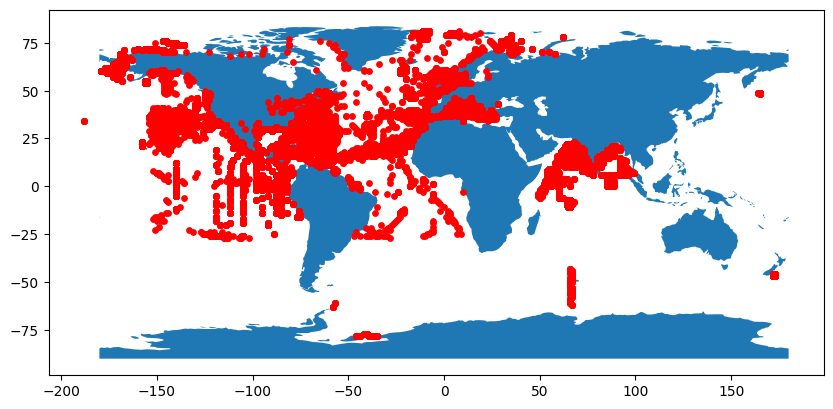

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

df = pd.read_csv("merged_table.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

###### checking global coverage of our plastic distribution

In [ ]:
#pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 53.8 MB/s eta 0:00:00


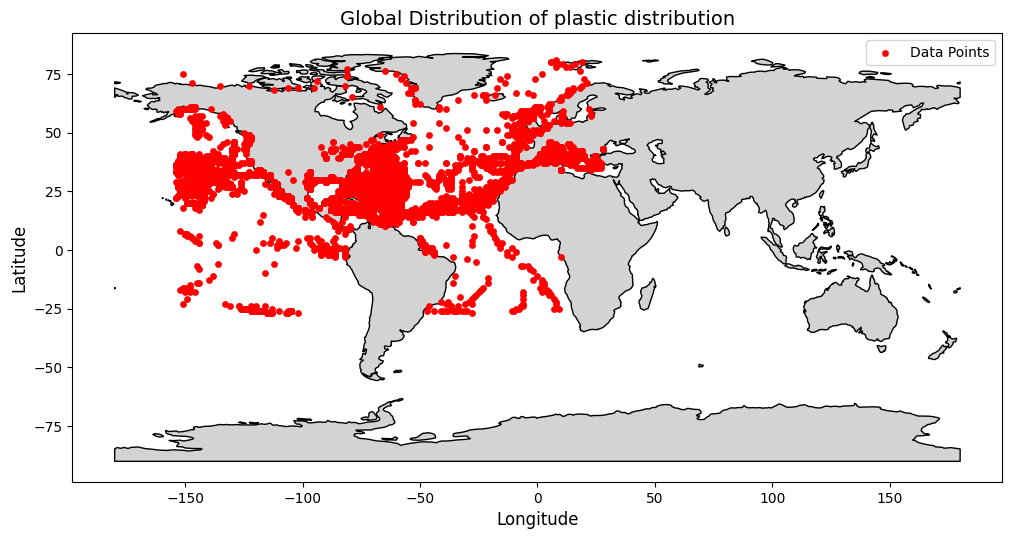

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geodatasets

df = plastic
#"total_chl_a_(mg_m^-2)"
df = df.dropna(subset=["latitude", "longitude", "density_class"])
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.plot(ax=ax, color="lightgray", edgecolor="black")  # Base map
gdf.plot(ax=ax, color="red", markersize=15, label="Data Points")
ax.set_title("Global Distribution of plastic distribution", fontsize=14)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend()
plt.show()


###### Checking global covergage of plankton(kl)

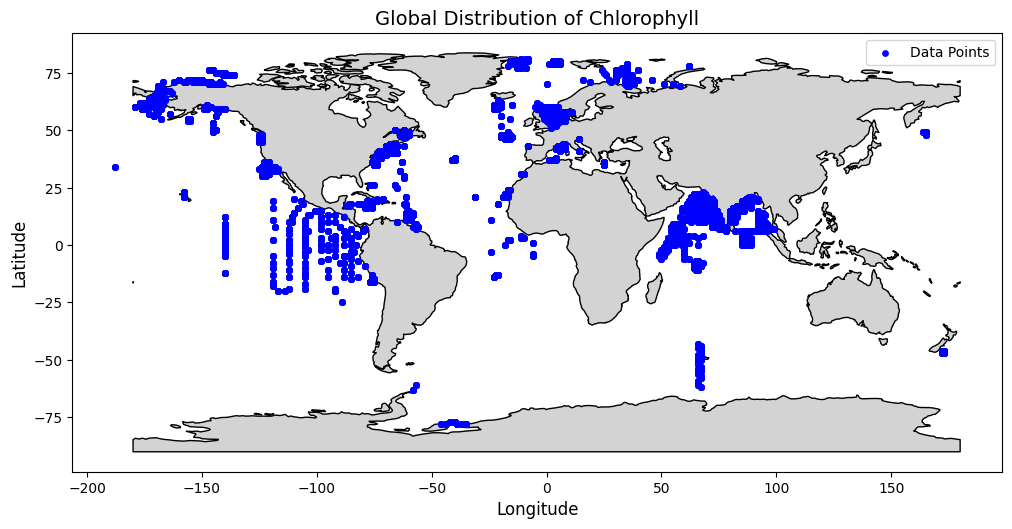

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geodatasets

df = kl
df = df.dropna(subset=["latitude", "longitude", "total_chl_a_magnitude"])

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.plot(ax=ax, color="lightgray", edgecolor="black")
gdf.plot(ax=ax, color="blue", markersize=15, label="Data Points")
ax.set_title("Global Distribution of Chlorophyll", fontsize=14)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend()
plt.show()


###### Induvidual plot to check each distribution induvidually

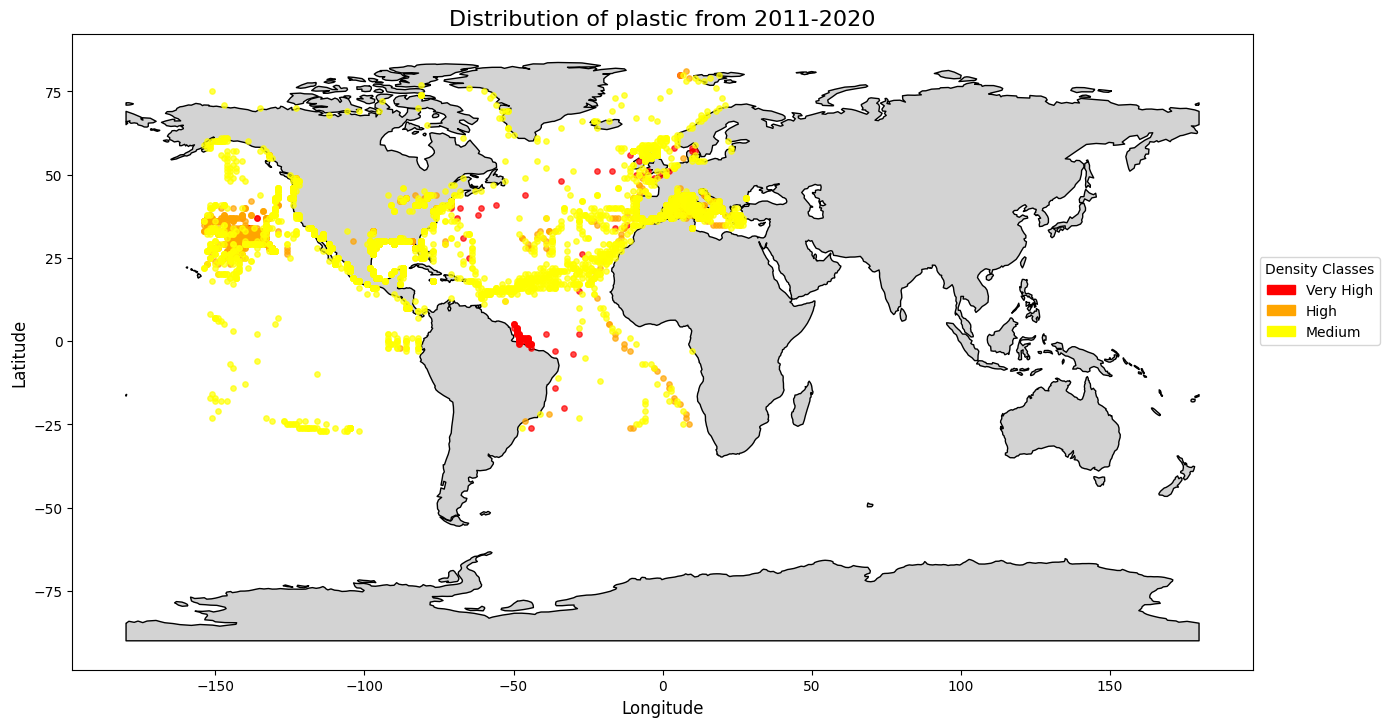

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geodatasets

df = plastic3
df = df.dropna(subset=["latitude", "longitude", "density_class"])
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df = df.dropna(subset=["longitude", "latitude"])
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
world = world.to_crs(gdf.crs)

#density classes
class_colors = {
    "Very High": "red",
    "High": "orange",
    "Medium": "yellow"
}

#world map
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
world.plot(ax=ax, color="lightgray", edgecolor="black")
for density_class, color in class_colors.items():
    if density_class in gdf["density_class"].unique():
        subset = gdf[gdf["density_class"] == density_class]
        subset.plot(
            ax=ax,
            markersize=15,
            color=color,
            alpha=0.7
        )
legend_patches = [
    mpatches.Patch(color=color, label=density_class)
    for density_class, color in class_colors.items()
]
ax.legend(
    handles=legend_patches,
    title="Density Classes",
    fontsize=10,
    loc='lower left',
    bbox_to_anchor=(1, 0.5)
)
ax.set_title("Distribution of plastic from 2011-2020", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.tight_layout()
plt.show()

###### Subplots of plastic distribution

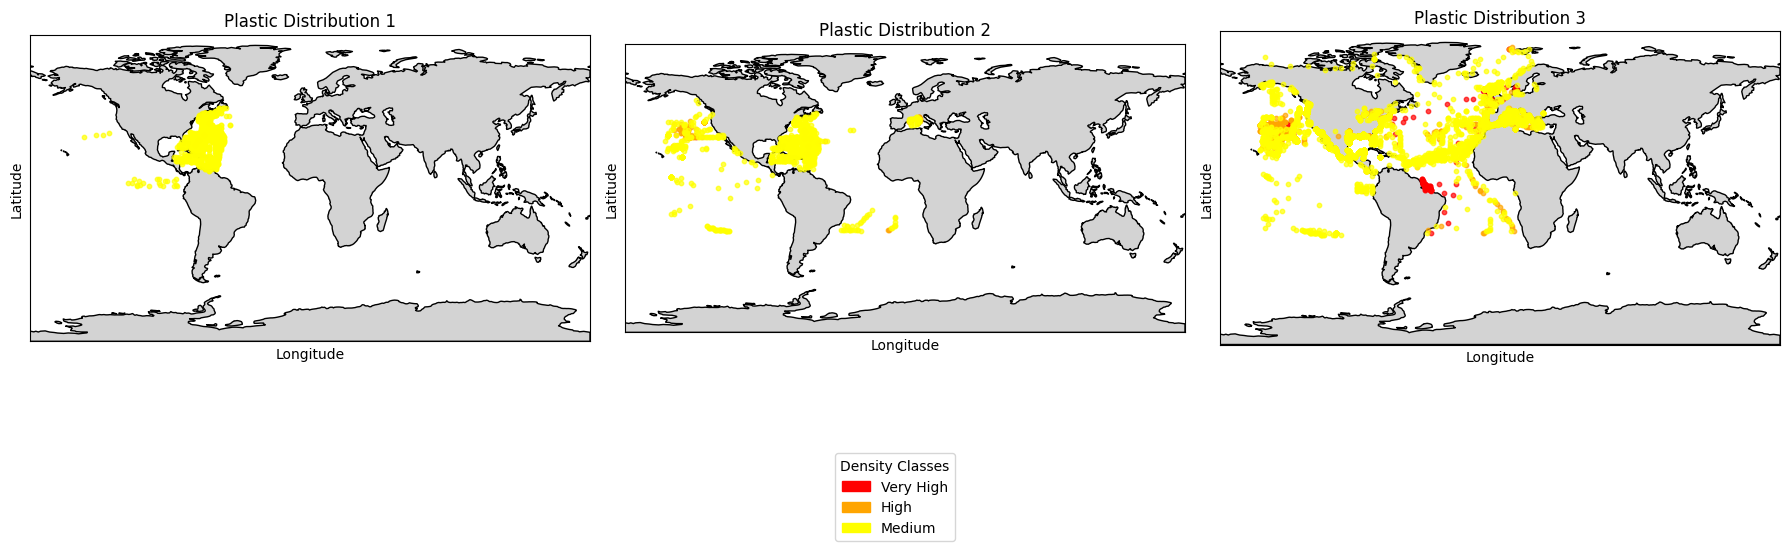

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geodatasets


class_colors = {
    "Very High": "red",
    "High": "orange",
    "Medium": "yellow"
}


world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
world = world.to_crs("EPSG:4326")

def clean_coordinates(df):
    df = df.dropna(subset=["latitude", "longitude", "density_class"])
    df = df[(df["longitude"] >= -180) & (df["longitude"] <= 180)]
    df = df[(df["latitude"] >= -90) & (df["latitude"] <= 90)]
    return df

# Clean data
plastic1 = clean_coordinates(plastic1)
plastic2 = clean_coordinates(plastic2)
plastic3 = clean_coordinates(plastic3)

#3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


def plot_plastic_data(plastic_df, ax):

    geometry = [Point(xy) for xy in zip(plastic_df['longitude'], plastic_df['latitude'])]
    gdf = gpd.GeoDataFrame(plastic_df, geometry=geometry, crs="EPSG:4326")
    world.plot(ax=ax, color="lightgray", edgecolor="black")
    for density_class, color in class_colors.items():
        if density_class in plastic_df["density_class"].unique():
            subset = gdf[gdf["density_class"] == density_class]
            subset.plot(
                ax=ax,
                markersize=10,
                color=color,
                alpha=0.7
            )
    ax.set_xlim(-180, 180)
    ax.set_ylim(-90, 90)

plot_plastic_data(plastic1, axes[0])
plot_plastic_data(plastic2, axes[1])
plot_plastic_data(plastic3, axes[2])

legend_patches = [
    mpatches.Patch(color=color, label=density_class)
    for density_class, color in class_colors.items()
]
fig.legend(
    handles=legend_patches,
    title="Density Classes",
    fontsize=10,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1)
)

for i, ax in enumerate(axes):
    ax.set_title(f"Plastic Distribution {i + 1}", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


###### Induvidual distribution of Plankton

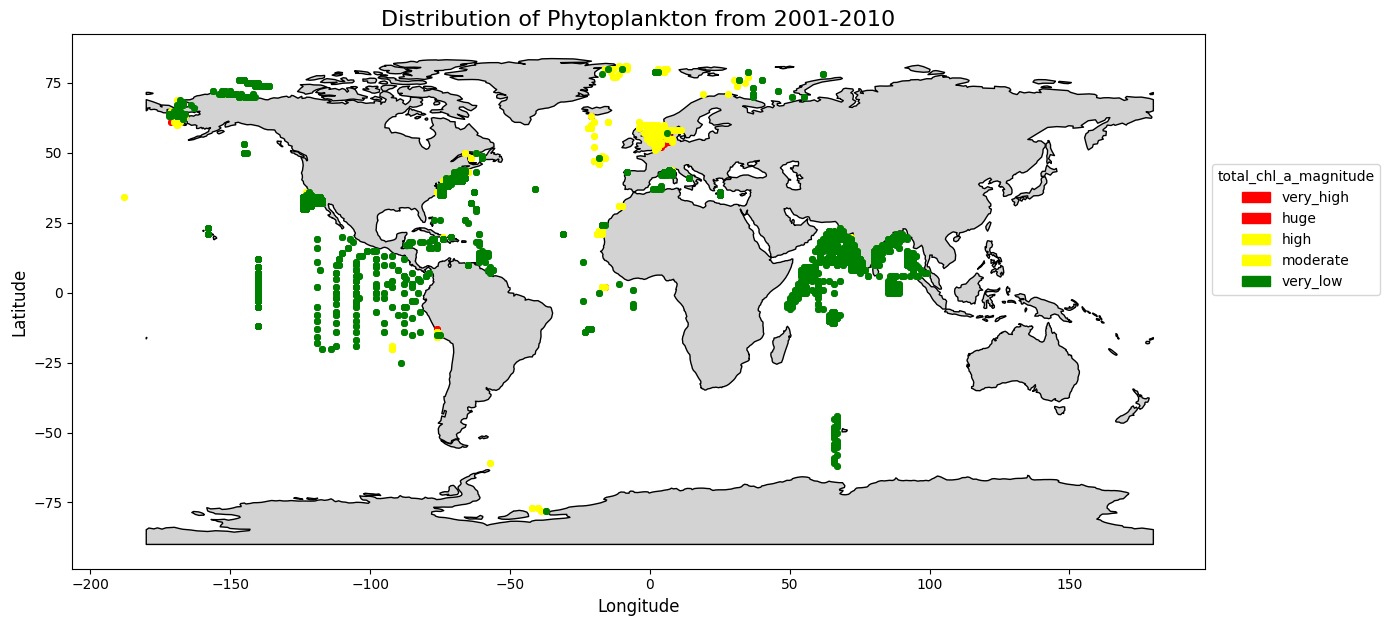

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geodatasets

df = kl1
df = df.dropna(subset=["latitude", "longitude", "total_chl_a_magnitude"])
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df = df.dropna(subset=["longitude", "latitude"])

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")


world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
world = world.to_crs(gdf.crs)
class_colors = {
    "very_high": "red",
    "huge": "red",
    "high": "yellow",
    "moderate" : "yellow",
    "very_low" : "green"
}

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
world.plot(ax=ax, color="lightgray", edgecolor="black")


for density_class, color in class_colors.items():
    if density_class in gdf["total_chl_a_magnitude"].unique():
        subset = gdf[gdf["total_chl_a_magnitude"] == density_class]
        subset.plot(
            ax=ax,
            markersize=15,
            color=color,
            alpha=0.7
        )
legend_patches = [
    mpatches.Patch(color=color, label=density_class)
    for density_class, color in class_colors.items()
]
ax.legend(
    handles=legend_patches,
    title="total_chl_a_magnitude",
    fontsize=10,
    loc='lower left',
    bbox_to_anchor=(1, 0.5)
)
ax.set_title("Distribution of Phytoplankton from 2001-2010", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.tight_layout()
plt.show()

###### Subplots of plankton distribution

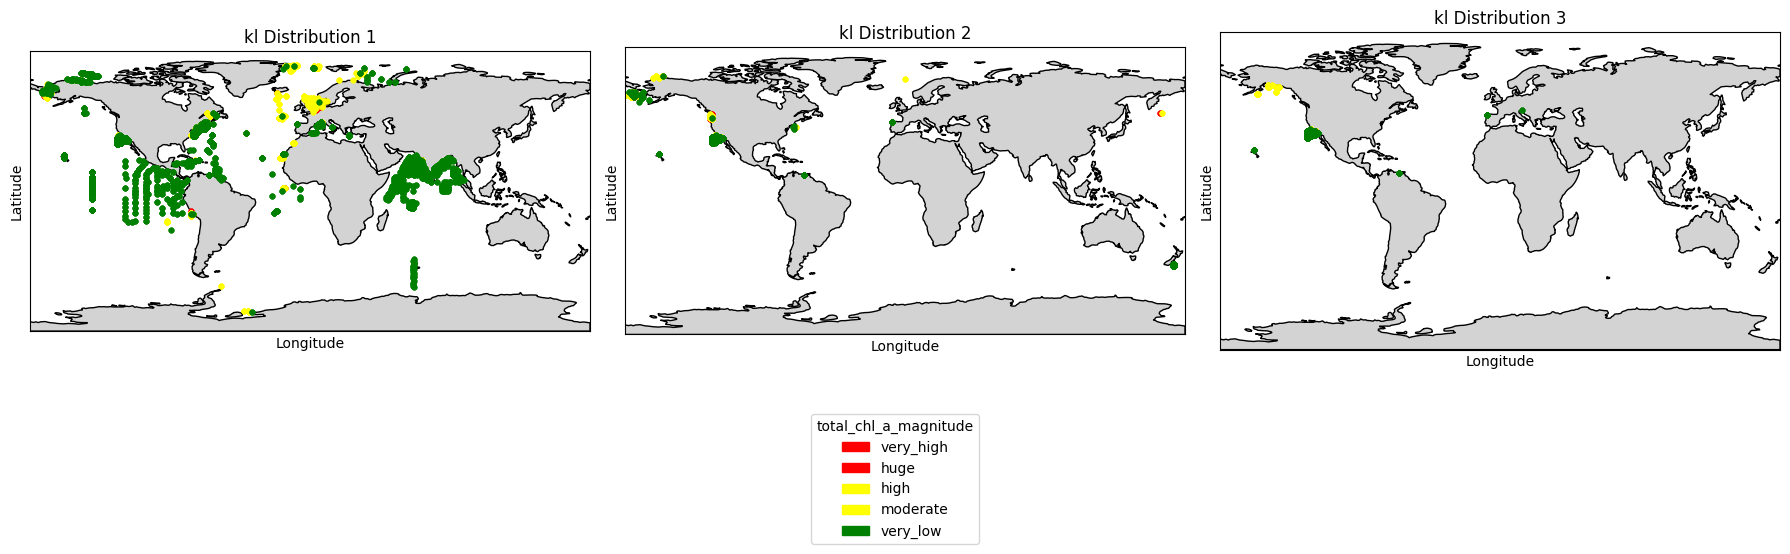

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geodatasets

class_colors = {
    "very_high": "red",
    "huge": "red",
    "high": "yellow",
    "moderate" : "yellow",
    "very_low" : "green"
}


world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
world = world.to_crs("EPSG:4326")
def clean_coordinates(df):
    df = df.dropna(subset=["latitude", "longitude", "total_chl_a_magnitude"])
    df = df[(df["longitude"] >= -180) & (df["longitude"] <= 180)]
    df = df[(df["latitude"] >= -90) & (df["latitude"] <= 90)]
    return df

kl1 = clean_coordinates(kl1)
kl2 = clean_coordinates(kl2)
kl3 = clean_coordinates(kl3)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
def plot_kl_data(kl_df, ax):
    geometry = [Point(xy) for xy in zip(kl_df['longitude'], kl_df['latitude'])]
    gdf = gpd.GeoDataFrame(kl_df, geometry=geometry, crs="EPSG:4326")
    world.plot(ax=ax, color="lightgray", edgecolor="black")
    for density_class, color in class_colors.items():
        if density_class in kl_df["total_chl_a_magnitude"].unique():
            subset = gdf[gdf["total_chl_a_magnitude"] == density_class]
            subset.plot(
                ax=ax,
                markersize=10,
                color=color,
                alpha=0.7
            )
    ax.set_xlim(-180, 180)
    ax.set_ylim(-90, 90)

plot_kl_data(kl1, axes[0])
plot_kl_data(kl2, axes[1])
plot_kl_data(kl3, axes[2])

legend_patches = [
    mpatches.Patch(color=color, label=density_class)
    for density_class, color in class_colors.items()
]
fig.legend(
    handles=legend_patches,
    title="total_chl_a_magnitude",
    fontsize=10,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1)
)
for i, ax in enumerate(axes):
    ax.set_title(f"kl Distribution {i + 1}", fontsize=12)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


###### plotting to check whether sea surface temperature affects plankton life

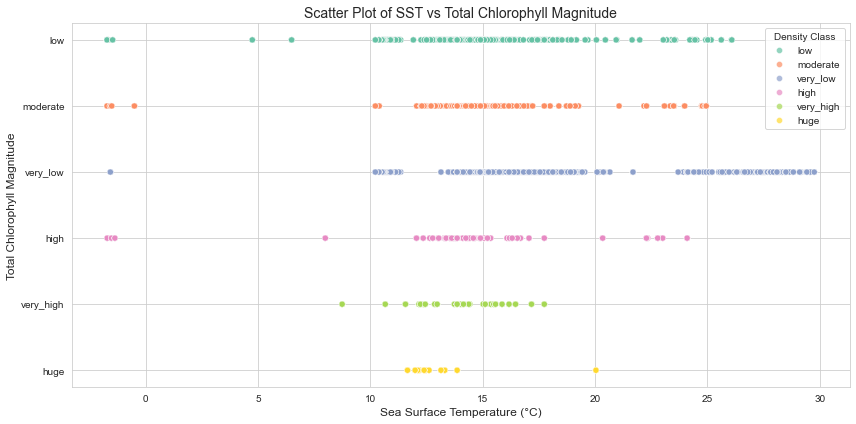

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_table = kl2.dropna(subset=["sst_(°c)", "total_chl_a_magnitude"])

#scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=filtered_table,
    x="sst_(°c)",
    y="total_chl_a_magnitude",
    hue="total_chl_a_magnitude",
    palette="Set2",
    alpha=0.7
)
plt.title("Scatter Plot of SST vs Total Chlorophyll Magnitude", fontsize=14)
plt.xlabel("Sea Surface Temperature (°C)", fontsize=12)
plt.ylabel("Total Chlorophyll Magnitude", fontsize=12)
plt.legend(title="Density Class", loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


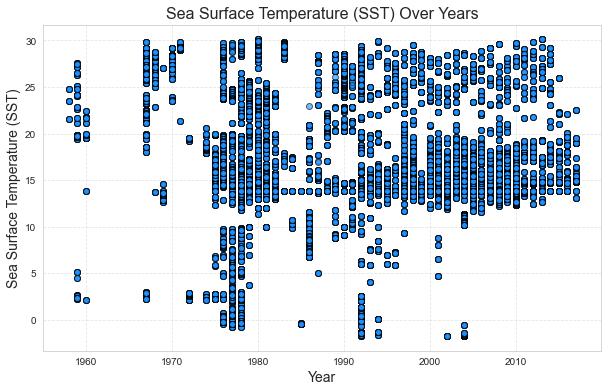

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

kl = kl.dropna(subset=["sst_(°c)", "year"])
plt.figure(figsize=(10, 6))
plt.scatter(kl["year"], kl["sst_(°c)"], alpha=0.6, edgecolor='k', color='dodgerblue')
plt.title("Sea Surface Temperature (SST) Over Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Sea Surface Temperature (SST)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\benie\AppData\Local\Temp\ipykernel_18076\2310913574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="year", y="sst_(°c)", data=avg_sst_per_year, palette="mako")


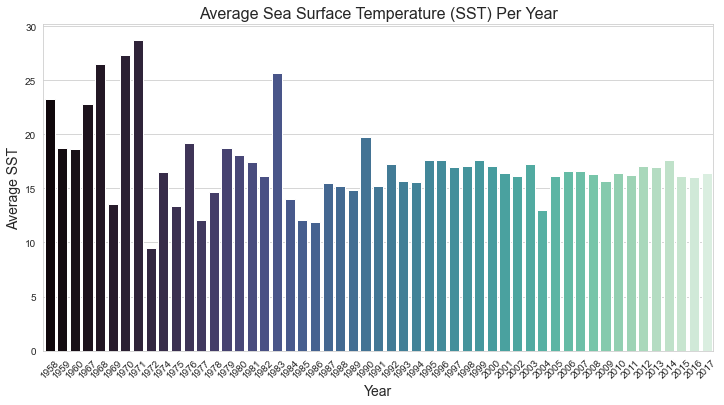

In [ ]:
avg_sst_per_year = kl.groupby("year")["sst_(°c)"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="year", y="sst_(°c)", data=avg_sst_per_year, palette="mako")
plt.title("Average Sea Surface Temperature (SST) Per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average SST", fontsize=14)
plt.xticks(rotation=45)
plt.show()


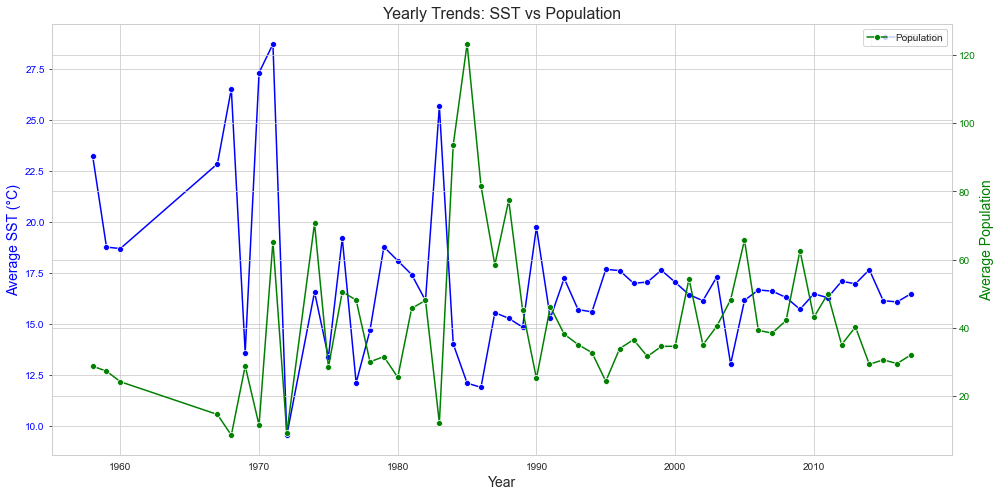

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Grouping data to calculate yearly averages
avg_sst_per_year = kl.groupby("year")["sst_(°c)"].mean().reset_index()
avg_population_per_year = kl.groupby("year")["depth-integrated_chl_a_(mg_m^-2)"].mean().reset_index()

# Merging SST and population data
merged_data = pd.merge(avg_sst_per_year, avg_population_per_year, on="year")

#SST vs Population
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.lineplot(
    x="year", y="sst_(°c)", data=merged_data, marker="o", ax=ax1, color="blue", label="SST (°C)"
)
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Average SST (°C)", fontsize=14, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax2 = ax1.twinx()
sns.lineplot(
    x="year", y="depth-integrated_chl_a_(mg_m^-2)", data=merged_data, marker="o", ax=ax2, color="green", label="Population"
)
ax2.set_ylabel("Average Population", fontsize=14, color="green")
ax2.tick_params(axis="y", labelcolor="green")
plt.title("Yearly Trends: SST vs Population", fontsize=16)
fig.tight_layout()
plt.show()


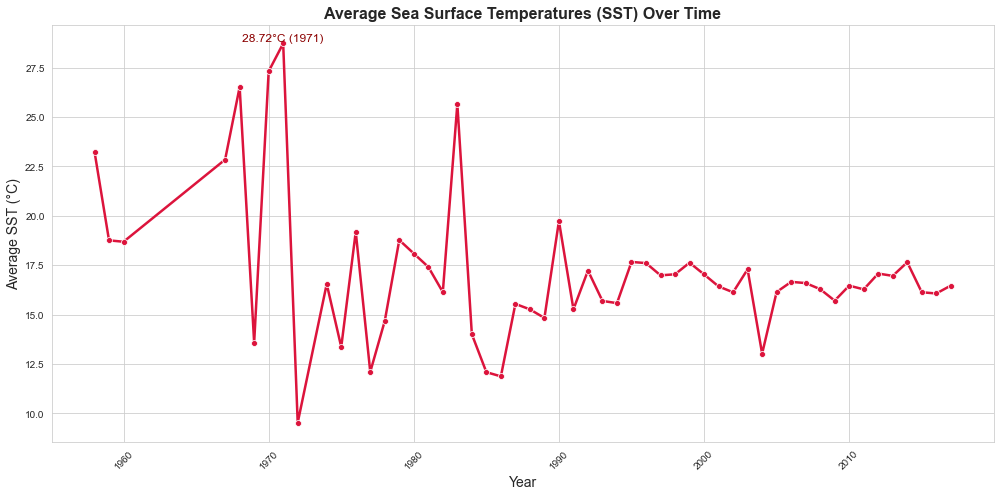

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_sst_per_year = kl.groupby("year")["sst_(°c)"].mean().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
sns.lineplot(x="year", y="sst_(°c)", data=avg_sst_per_year, marker="o", color="crimson", linewidth=2.5)
max_sst = avg_sst_per_year.loc[avg_sst_per_year["sst_(°c)"].idxmax()]
plt.text(max_sst["year"], max_sst["sst_(°c)"] + 0.1,
         f'{max_sst["sst_(°c)"]:.2f}°C ({int(max_sst["year"])})',
         color="darkred", fontsize=12, ha="center")
plt.title("Average Sea Surface Temperatures (SST) Over Time", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average SST (°C)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Performing some p-test. to check whether marine pollution has impacted plankton population

In [ ]:
# Round latitude and longitude to integers
lat_long_1 = set(zip(merged_table1['latitude'], merged_table1['longitude']))
lat_long_2 = set(zip(merged_table2['latitude'], merged_table2['longitude']))
lat_long_3 = set(zip(merged_table3['latitude'], merged_table3['longitude']))
common_lat_long = lat_long_1 & lat_long_2 & lat_long_3
unique_to_table1 = lat_long_1 - (lat_long_2 | lat_long_3)
print(f"Common lat-long pairs: {len(common_lat_long)}")
print(f"Unique to table1: {len(unique_to_table1)}")


Common lat-long pairs: 8
Unique to table1: 16


In [ ]:
import pandas as pd

def filter_by_common_lat_long(df, common_pairs):
  filtered_df = df[df.apply(lambda row: (row['latitude'], row['longitude']) in common_pairs, axis=1)]
  return filtered_df

# Filter each DataFrame
filtered_table1 = filter_by_common_lat_long(merged_table1, common_lat_long)
filtered_table2 = filter_by_common_lat_long(merged_table2, common_lat_long)
filtered_table3 = filter_by_common_lat_long(merged_table3, common_lat_long)

In [ ]:
filtered_lat_long_1 = set(zip(filtered_table1['latitude'], filtered_table1['longitude']))
filtered_lat_long_2 = set(zip(filtered_table2['latitude'], filtered_table2['longitude']))
filtered_lat_long_3 = set(zip(filtered_table3['latitude'], filtered_table3['longitude']))

#check
if filtered_lat_long_1 == filtered_lat_long_2 == filtered_lat_long_3:
    print("All three filtered DataFrames have identical lat-long pairs.")
else:
    print("The filtered DataFrames have different lat-long pairs.")

All three filtered DataFrames have identical lat-long pairs.


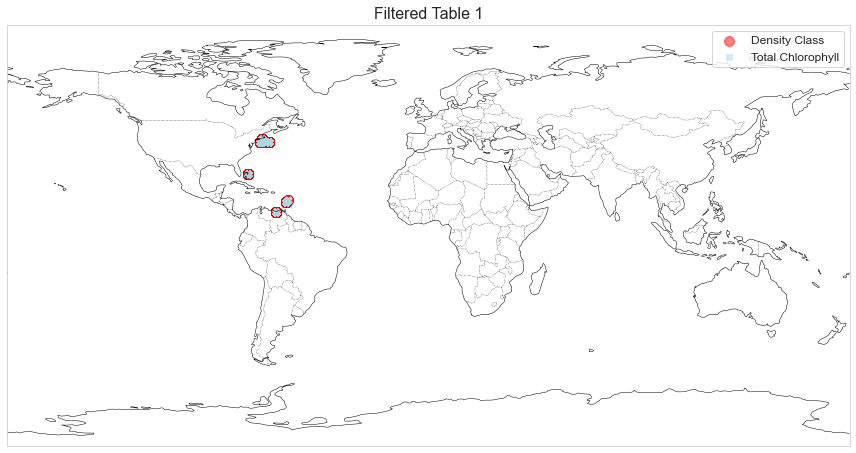

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

data = filtered_table1
data = data.dropna(subset=["latitude", "longitude", "density_class", "total_chl_a_magnitude"])

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.set_global()

#density_class with marker X
density_data = data[data["density_class"].notnull()]
ax.scatter(
    density_data["longitude"],
    density_data["latitude"],
    color="red",
    marker="o",
    label="Density Class",
    transform=ccrs.PlateCarree(),
    alpha=0.5,
    s=100
)

#total_chl_a_magnitude with marker O
chl_data = data[data["total_chl_a_magnitude"].notnull()]
ax.scatter(
    chl_data["longitude"],
    chl_data["latitude"],
    color="lightblue",
    marker="X",
    label="Total Chlorophyll",
    transform=ccrs.PlateCarree(),
    alpha=0.5,
    s=50
)

# Add title and legend
ax.set_title("Filtered Table 1", fontsize=16)
ax.legend(loc="upper right", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
print(filtered_table3.isnull().sum())


measurement                         223
unit                                223
density_range                       223
density_class                       223
latitude                              0
longitude                             0
date_plastic3                       223
date_kl3                             21
year                                 21
sst_(°c)                             21
surface_par_(e_m^-2_day^-1)          21
depth-integrated_chl_a_(mg_m^-2)     21
total_chl_a_magnitude                21
dtype: int64


In [ ]:
#check to see if merged table differ or not
common_lat_long_df = pd.DataFrame(common_lat_long, columns=['latitude', 'longitude'])
ft1 = pd.merge(merged_table1, common_lat_long_df, on=['latitude', 'longitude'])
ft2 = pd.merge(merged_table2, common_lat_long_df, on=['latitude', 'longitude'])
ft3 = pd.merge(merged_table3, common_lat_long_df, on=['latitude', 'longitude'])
print(f"Filtered Table 1 size: {ft1.shape}")
print(f"Filtered Table 2 size: {ft2.shape}")
print(f"Filtered Table 3 size: {ft3.shape}")


Filtered Table 1 size: (9698, 13)
Filtered Table 2 size: (972, 13)
Filtered Table 3 size: (244, 13)


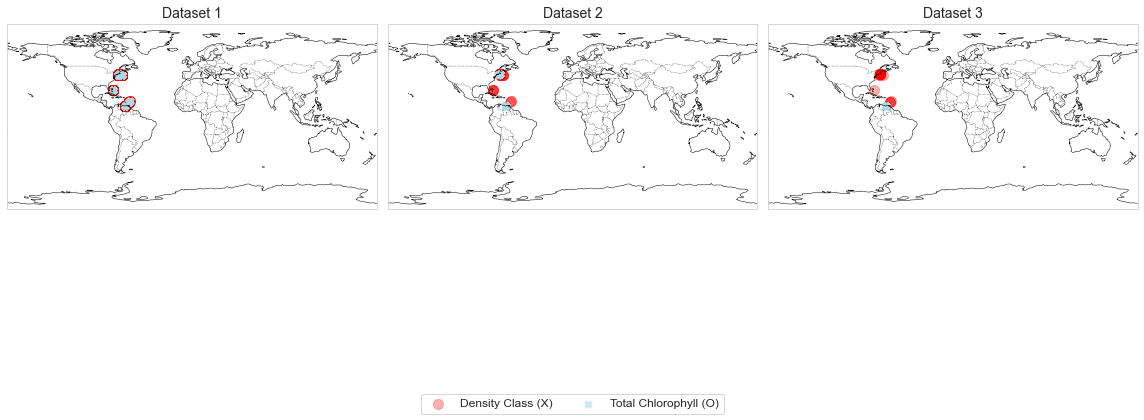

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

datasets = [ft1, ft2, ft3]
titles = ["Dataset 1", "Dataset 2", "Dataset 3"]

fig, axes = plt.subplots(1, 3, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})
for i, (data, ax) in enumerate(zip(datasets, axes)):
    data = data[["latitude", "longitude", "density_class", "total_chl_a_magnitude"]]
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    ax.set_global()
    density_data = data[data["density_class"].notnull()]
    ax.scatter(
        density_data["longitude"],
        density_data["latitude"],
        color="red",
        marker="o",
        label="Density Class (X)",
        transform=ccrs.PlateCarree(),
        alpha=0.3,
        s=100
    )
    chl_data = data[data["total_chl_a_magnitude"].notnull()]
    ax.scatter(
        chl_data["longitude"],
        chl_data["latitude"],
        color="lightblue",
        marker="X",
        label="Total Chlorophyll (O)",
        transform=ccrs.PlateCarree(),
        alpha=0.5,
        s=50
    )
    ax.set_title(titles[i], fontsize=14)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", fontsize=12, ncol=2)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


######  Common lat-long pairs plastic densty and chlorophyll content

In [ ]:
print(filtered_table1['measurement'].sum())
print(filtered_table2['measurement'].sum())
print(filtered_table3['measurement'].sum())
print()
print(filtered_table1['depth-integrated_chl_a_(mg_m^-2)'].sum())
print(filtered_table2['depth-integrated_chl_a_(mg_m^-2)'].sum())
print(filtered_table3['depth-integrated_chl_a_(mg_m^-2)'].sum())

0.219556
0.08684
74.119

276.3846
206.485
102.17


## Perfoming test

Null Hypothesis (H₀): There is no significant relationship between plastic pollution density and phytoplankton population (chlorophyll density).
Alternative Hypothesis (Hₐ): There is a significant relationship between plastic pollution density and phytoplankton population (chlorophyll density).
For temporal analysis:

H₀ (Temporal): There is no significant change in chlorophyll density or plastic pollution over the three time periods.
Hₐ (Temporal): There is a significant change in chlorophyll density or plastic pollution over the three time periods.

In [ ]:
datasets = [filtered_table1, filtered_table2, filtered_table3]
combined = pd.concat(datasets, keys=["1980-2000", "2000-2010", "2010-2020"])
combined.reset_index(level=0, inplace=True)
combined.rename(columns={"level_0": "time_period"}, inplace=True)


In [ ]:
combined['density_class'].unique()

In [ ]:
combined.columns

In [ ]:
print(combined["density_class"].unique())
print(combined["total_chl_a_magnitude"].unique())
density_class_mode = combined["density_class"].mode()[0]
total_chl_a_magnitude_mode = combined["total_chl_a_magnitude"].mode()[0]

print(f"Mode of density_class: {density_class_mode}")
print(f"Mode of total_chl_a_magnitude: {total_chl_a_magnitude_mode}")

combined["density_class"].fillna(density_class_mode, inplace=True)
combined["total_chl_a_magnitude"].fillna(total_chl_a_magnitude_mode, inplace=True)

print(combined["density_class"].unique())
print(combined["total_chl_a_magnitude"].unique())

In [ ]:
print("Before filling missing values:")
print("Unique density_class values:", combined["density_class"].unique())
print("Unique total_chl_a_magnitude values:", combined["total_chl_a_magnitude"].unique())

#mode imputation
density_class_mode = combined["density_class"].mode()[0]
total_chl_a_magnitude_mode = combined["total_chl_a_magnitude"].mode()[0]
combined["density_class"].fillna(density_class_mode, inplace=True)
combined["total_chl_a_magnitude"].fillna(total_chl_a_magnitude_mode, inplace=True)
print("\nAfter filling missing values:")
print("Unique density_class values:", combined["density_class"].unique())
print("Unique total_chl_a_magnitude values:", combined["total_chl_a_magnitude"].unique())


In [ ]:
#combined = combined.dropna(subset=["latitude", "longitude", "density_class", "total_chl_a_magnitude"])
combined = combined[["latitude", "longitude", "density_class", "total_chl_a_magnitude"]]
mapping = {"Medium" : 1,
            "Very High" : 2}

combined["plastic_density_encoded"] = combined["density_class"].map(mapping)

mapping = {"very_low" : 1,
           "low" :1,
           "moderate": 2,
           "high" : 3}
combined["chlorophyll_bin"] = combined["total_chl_a_magnitude"].map(mapping)

print(combined['plastic_density_encoded'].unique())
print(combined['chlorophyll_bin'].unique())

In [ ]:
combined = combined.dropna(subset=["latitude", "longitude", "density_class", "total_chl_a_magnitude"])
combined = combined[["latitude", "longitude", "density_class", "total_chl_a_magnitude"]]
density_mapping = {"Medium": 1, "High": 2, "very_high": 3}
combined["plastic_density_encoded"] = combined["density_class"].map(density_mapping)
print(combined['plastic_density_encoded'].unique())

#chlorophyll bins
chl_mapping = {
    "very_low": 1,
    "low": 1,
    "moderate": 2,
    "high": 3,
    "very_high": 3
}
combined["chlorophyll_bin"] = combined["total_chl_a_magnitude"].map(chl_mapping)
print(combined['chlorophyll_bin'].unique())

In [ ]:
combined['plastic_density_encoded'].unique()

In [ ]:
plastic_density_encoded_mode = combined["plastic_density_encoded"].mode()[0]

print(f"Mode of plastic_density_encoded: {plastic_density_encoded_mode}")

combined["plastic_density_encoded"].fillna(plastic_density_encoded_mode, inplace=True)


In [ ]:
print(combined[["plastic_density_encoded", "chlorophyll_bin"]].isnull().sum())
print(combined["chlorophyll_bin"].describe())
print(combined["chlorophyll_bin"].isnull().sum())


In [ ]:
print(combined["plastic_density_encoded"].isnull().sum())
print(combined["chlorophyll_bin"].isnull().sum())
print(combined["plastic_density_encoded"].value_counts())
print(combined["chlorophyll_bin"].value_counts())


In [ ]:
from scipy.stats import spearmanr, pearsonr

# Spearman Correlation
spearman_corr, p_val_spearman = spearmanr(combined["plastic_density_encoded"], combined["chlorophyll_bin"])
print(f"Spearman Correlation: {spearman_corr}, p-value: {p_val_spearman}")

# Pearson Correlation
pearson_corr, p_val_pearson = pearsonr(combined["plastic_density_encoded"], combined["chlorophyll_bin"])
print(f"Pearson Correlation: {pearson_corr}, p-value: {p_val_pearson}")


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(combined["plastic_density_encoded"], combined["chlorophyll_bin"], alpha=0.5, color="blue")
plt.xlabel("Plastic Density (Encoded)")
plt.ylabel("Chlorophyll Levels (Encoded)")
plt.title("Scatter Plot of Plastic Density vs Chlorophyll Levels")
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(combined["plastic_density_encoded"], combined["chlorophyll_bin"])
#Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")


In [ ]:
contingency_table = pd.crosstab(combined["plastic_density_encoded"], combined["chlorophyll_bin"])

print(contingency_table)
#Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title("Heatmap of Plastic Density vs. Chlorophyll Levels", fontsize=16)
plt.xlabel("Chlorophyll Bin", fontsize=12)
plt.ylabel("Plastic Density Encoded", fontsize=12)
plt.show()


Vessel datasets from 2014, 2017, 2020 -> The global fisheries site contains vessl dataset from 2010 to 2017. Each year csv file spanning over 3Gb in size.

In [ ]:
#vessel_2017 = pd.read_csv('2017.csv')
#vessel_2017.head(3)

In [ ]:
#vessel_2014 = pd.read_csv('2014.csv')
#vessel_2014.head(3)

In [ ]:
#vessel_2020 = pd.read_csv('2020.csv')
#vessel_2020.head(3)

Concatenating all vessel files into one dataset

In [ ]:
#frames = [vessel_2014, vessel_2017, vessel_2020]

#vessels = pd.concat(frames)

In [ ]:
#vessels
#df=vessels

The vessel dataset contans 56 million records spanning over 4.7Gb. We have chosen two geartypes: purse seines and drifting longlines. These two boat types are responsible for the farming of Tuna and school fishes.

Our goal is to check whether marine pollution has caused a decline in the phytoplankton species. Since smaller species like phytoplankton can get affected by pollution and decline in population we aim to map this decline. Other macro fishes like schooling fish (vessel type: pure seines) and Tuna (vessel type: drifting longlines) depend on phytoplankton and schooling fish to survive. We will be mapping to check how marine pollution has impacted fishing lines and the marine biodiversity ranging from 2000-2017.

Integrating these datasets based on latitude and longitude is a viable option but since our focus is on mapping trends integrating these will not yield better result as we could lose potential data.

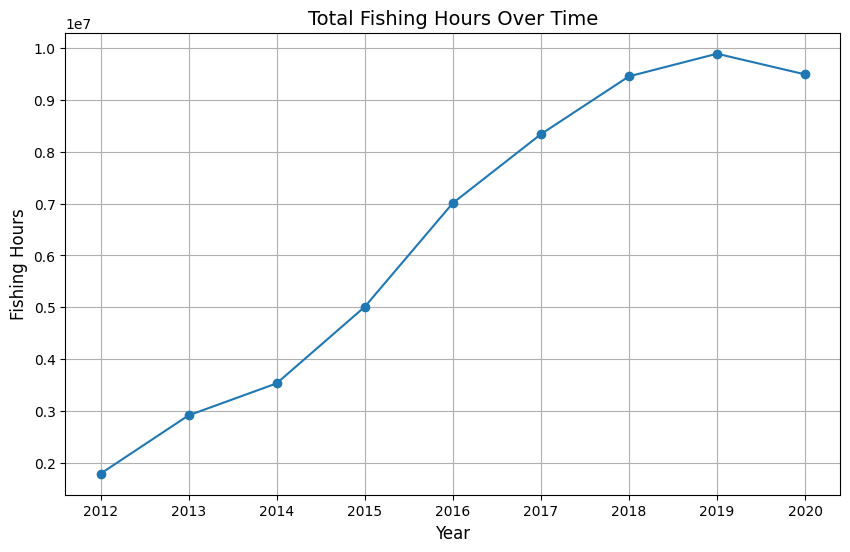

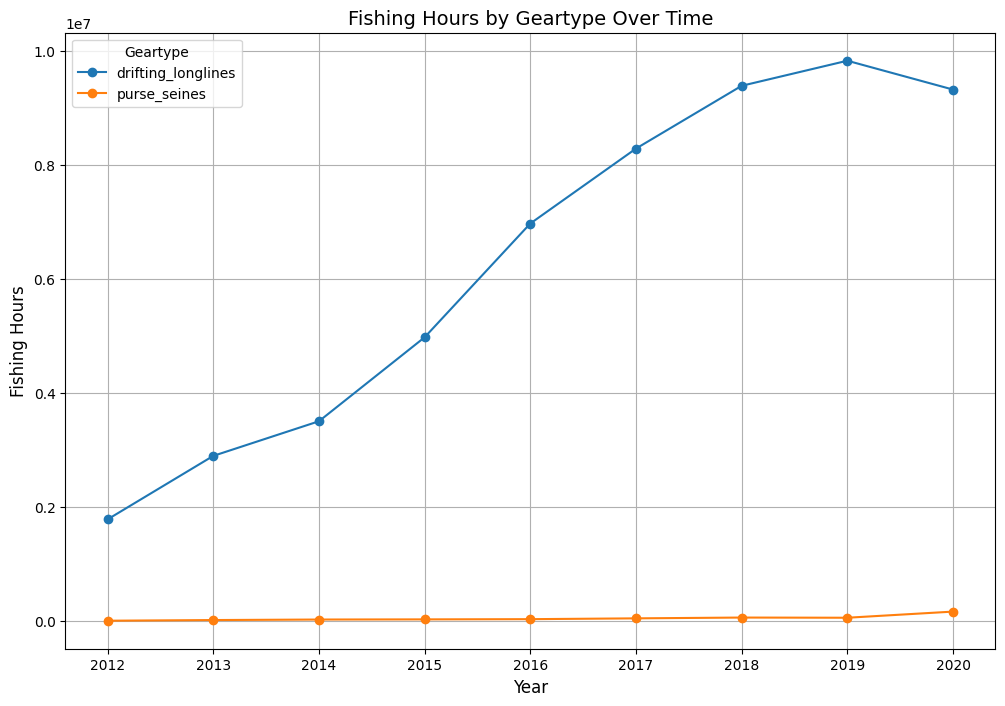

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year
df['year'] = df['date'].dt.year

# Aggregate fishing hours by year
yearly_fishing_hours = df.groupby('year')['fishing_hours'].sum().reset_index()

# Plot total fishing hours over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_fishing_hours['year'], yearly_fishing_hours['fishing_hours'], marker='o', linestyle='-')
plt.title('Total Fishing Hours Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fishing Hours', fontsize=12)
plt.grid(True)
plt.show()

# Aggregate fishing hours by geartype and year
geartype_yearly_hours = df.groupby(['year', 'geartype'])['fishing_hours'].sum().unstack().reset_index()

# Plot fishing hours by geartype over time
plt.figure(figsize=(12, 8))
for geartype in geartype_yearly_hours.columns[1:]:
    plt.plot(geartype_yearly_hours['year'], geartype_yearly_hours[geartype], marker='o', label=geartype)

plt.title('Fishing Hours by Geartype Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fishing Hours', fontsize=12)
plt.legend(title='Geartype')
plt.grid(True)
plt.show()


C:\Users\vkmad\AppData\Local\Temp\ipykernel_28812\268130415.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Reds")


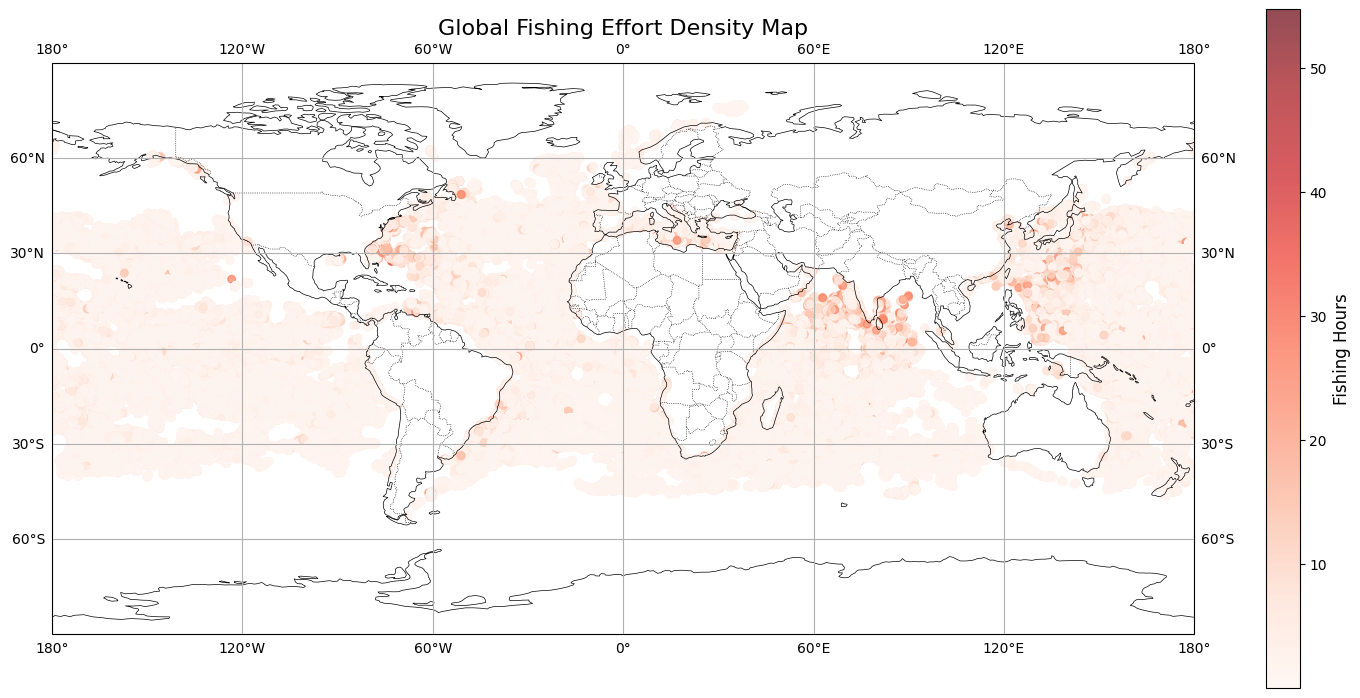

In [ ]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm


# Ensure required columns are present
required_columns = ['cell_ll_lat', 'cell_ll_lon', 'fishing_hours']
df = df[required_columns]

# Drop rows with missing values
df = df.dropna(subset=['cell_ll_lat', 'cell_ll_lon', 'fishing_hours'])

# Normalize fishing hours for better visualization
norm = Normalize(vmin=df['fishing_hours'].min(), vmax=df['fishing_hours'].max())
cmap = cm.get_cmap("Reds")

# Create a plot with Cartopy
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.set_global()

# Plot fishing effort as red circles with transparency
scatter = ax.scatter(
    df['cell_ll_lon'],
    df['cell_ll_lat'],
    c=df['fishing_hours'],
    cmap=cmap,
    norm=norm,
    transform=ccrs.PlateCarree(),
    alpha=0.7,
    s=30
)

# Add colorbar for fishing hours
cbar = plt.colorbar(scatter, ax=ax, orientation="vertical", shrink=0.7, pad=0.05)
cbar.set_label("Fishing Hours", fontsize=12)

# Add title and gridlines
ax.set_title("Global Fishing Effort Density Map", fontsize=16)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Show the plot
plt.tight_layout()
plt.show()



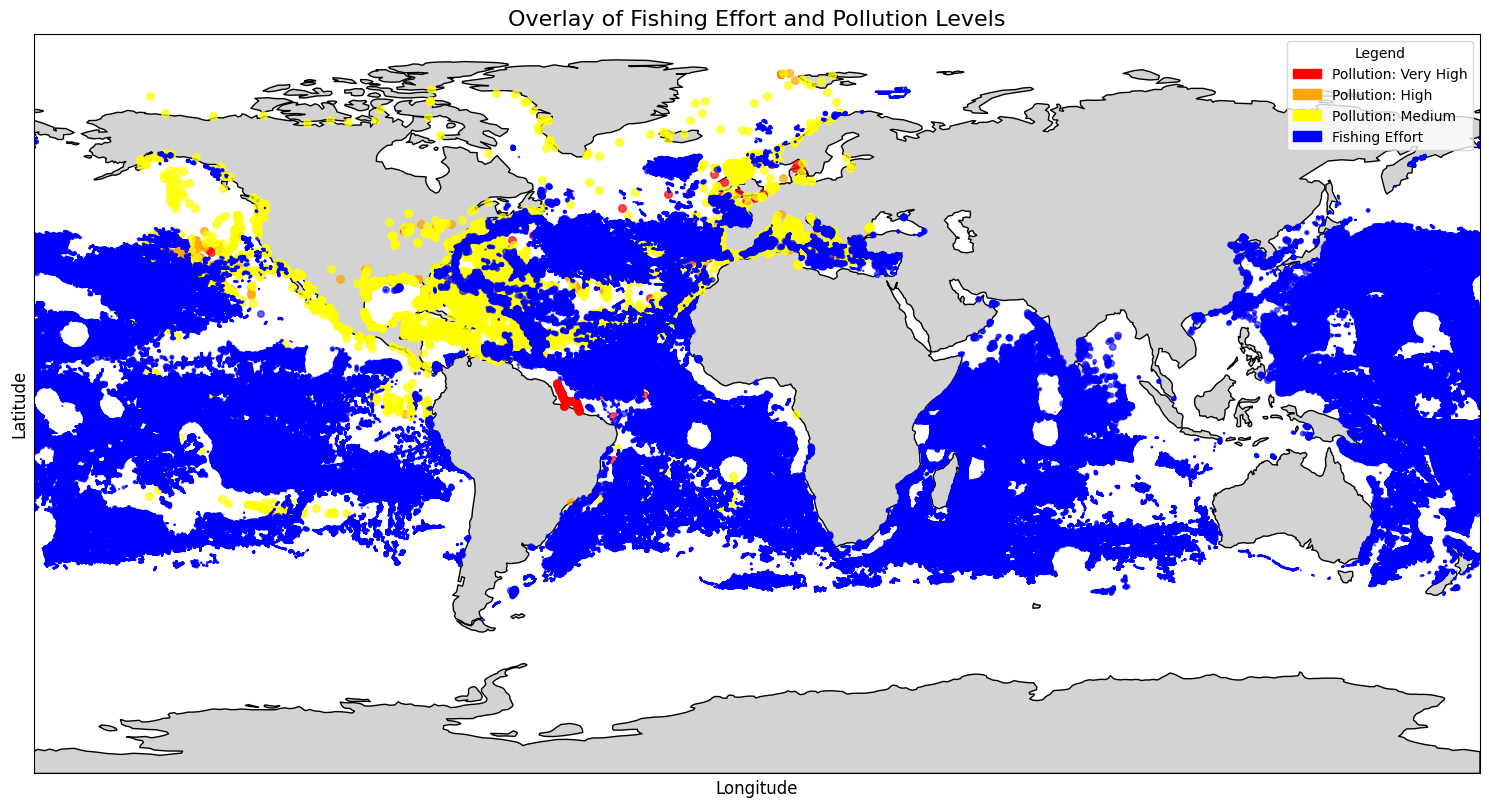

In [ ]:
import matplotlib.patches as mpatches
import geodatasets


pollution_colors = {
    "Very High": "red",
    "High": "orange",
    "Medium": "yellow"
}
fishing_color = "blue"
pollution_df = pd.read_csv('Marine_Microplastics.csv')
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
world = world.to_crs("EPSG:4326")

def clean_and_bin_coordinates(df, lat_col, lon_col, other_columns):
    df = df.dropna(subset=[lat_col, lon_col] + other_columns)
    df = df[(df[lon_col] >= -180) & (df[lon_col] <= 180)]
    df = df[(df[lat_col] >= -90) & (df[lat_col] <= 90)]
    df["lat_bin"] = df[lat_col].round(1)
    df["lon_bin"] = df[lon_col].round(1)
    return df

# Clean and bin pollution
pollution_df = clean_and_bin_coordinates(pollution_df, "Latitude", "Longitude", ["Density Class"])
fishing_df = clean_and_bin_coordinates(df, "cell_ll_lat", "cell_ll_lon", ["fishing_hours"])
pollution_geometry = [Point(xy) for xy in zip(pollution_df["lon_bin"], pollution_df["lat_bin"])]
pollution_gdf = gpd.GeoDataFrame(pollution_df, geometry=pollution_geometry, crs="EPSG:4326")

fishing_geometry = [Point(xy) for xy in zip(fishing_df["lon_bin"], fishing_df["lat_bin"])]
fishing_gdf = gpd.GeoDataFrame(fishing_df, geometry=fishing_geometry, crs="EPSG:4326")


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color="lightgray", edgecolor="black")
for density_class, color in pollution_colors.items():
    if density_class in pollution_gdf["Density Class"].unique():
        subset = pollution_gdf[pollution_gdf["Density Class"] == density_class]
        subset.plot(
            ax=ax,
            markersize=30,
            color=color,
            alpha=0.7,
            label=f"Pollution: {density_class}"
        )
fishing_gdf.plot(
    ax=ax,
    markersize=fishing_gdf["fishing_hours"] / fishing_gdf["fishing_hours"].max() * 50,
    color=fishing_color,
    alpha=0.6,
    label="Fishing Effort"
)
legend_patches = [
    mpatches.Patch(color=color, label=f"Pollution: {density_class}")
    for density_class, color in pollution_colors.items()
]
legend_patches.append(mpatches.Patch(color=fishing_color, label="Fishing Effort"))
ax.legend(
    handles=legend_patches,
    title="Legend",
    fontsize=10,
    loc="upper right"
)


ax.set_title("Overlay of Fishing Effort and Pollution Levels", fontsize=16)
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

